In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import networkx as nx
import heapq
import time
from utils_SOC_discrete import Biobjective_search_and_heuristic_calc_class, GraphConstructionDiscretization, extract_costs, check_pareto_optimality, plot_costs, reconstruct_solution_paths, plot_map_with_path_and_soc
from matplotlib.patches import Circle

In [11]:
# =============================================================================
# Constants, UAV parameters, and initial conditions
# =============================================================================
# Define QZ circles as tuples (x, y, radius, only_electric_radius, risk_limit, toggle_only_electric_or_no_path) toggle_only_electric_or_no_path = 0 for no path, 1 for only electric
map_qz = [(0.0, 0.0, 6.0, 2.0, 30, 1), (12.0, 10.0, 4.0, 1.5, 30, 1)]
# max_risk_limit = 2 / 3 * sum([circle[-2] for circle in map_qz])
# acceptable_risk_limit = 1 / 3 * sum([circle[-2] for circle in map_qz])
max_risk_limit = 200
acceptable_risk_limit = 0
start = (-5.0, -5.0)       # Starting point
goal = (15, 15)        # Goal point

# UAV characteristics
alpha = 10
recharge_factor = 2
beta = alpha / recharge_factor

q_min, q_max, q_start = 20, 100, 100
discretization_angle = 10
factor_soc = 4
discretization_SOC = 80/factor_soc
# Risk limits (temporary) and an index map for circles
# risk_limit = {circle: 30 for circle in map_qz}

In [12]:
# =============================================================================
# Graph Construction and Node Creation
# =============================================================================

# Instantiate the graph construction object.
# (Assuming you have already refactored your class into GraphConstructionDiscretization.)
graph_object = GraphConstructionDiscretization(
    map_qz, start, goal, q_min, q_max, alpha, beta, discretization_angle, discretization_SOC, max_risk_limit, acceptable_risk_limit
)

start_time = time.time()
# Create nodes and the index maps.
nodes, index_map, reverse_index_map = graph_object.create_nodes()


# Build the visibility graph
graph_object.build_visibility_graph(reverse_index_map)
end_time = time.time()
print(f"The time req for grap construction: {end_time-start_time}")


The time req for grap construction: 19.726711988449097


In [13]:
# Assign heuristic cost to each node
graph_object.assign_heuristic_costs(reverse_index_map)

# Run the biobjective search
start_state = len(graph_object.SOC)-1
goal_state = len(reverse_index_map)-1

### Biobjective search object 
search_object = Biobjective_search_and_heuristic_calc_class(graph_object, start_state, goal_state)
# start_time = time.time()
# search_object.Heuristic_calc()
# end_time = time.time()
# print(f"The time req for heuristic calc: {end_time-start_time}")

start_time = time.time()
sols, g2_min = search_object.biobjective_search(type = "constant", reduce_factor_constant=1)
end_time = time.time()
print(f"The time req for search: {end_time-start_time}")

What is the current state: 380, current f1 14.396686554308676, current f2 5.14882985236843, current g1 14.396686554308676, current g2 5.14882985236843
What is the current state: 380, current f1 14.45607516161937, current f2 4.98625518534795, current g1 14.45607516161937, current g2 4.98625518534795
What is the current state: 380, current f1 14.60584660367056, current f2 4.14964656701706, current g1 14.60584660367056, current g2 4.14964656701706
What is the current state: 380, current f1 14.901903883396876, current f2 3.27850132524347, current g1 14.901903883396876, current g2 3.27850132524347
What is the current state: 380, current f1 15.124903812347462, current f2 2.51591005765918, current g1 15.124903812347462, current g2 2.51591005765918
What is the current state: 380, current f1 15.14446853657686, current f2 2.35333539063870, current g1 15.14446853657686, current g2 2.35333539063870
What is the current state: 380, current f1 15.32444667257791, current f2 1.84088870319584, current g

In [14]:
# # Assign heuristic cost to each node
# graph_object.assign_heuristic_costs(reverse_index_map)

# # Run the biobjective search
# start_state = len(graph_object.SOC)-1
# # goal_state = list(range(factor_soc+1, 2*factor_soc+1,1))
# goal_state = len(reverse_index_map)-1

# start_time = time.time()
# sols, g2_min = biobjective_search(graph_object, start_state, goal_state, reduce_factor=1)
# end_time = time.time()
# print(f"The time req for biobjective_search: {end_time-start_time}")
# # =============================================================================
# # Pareto Optimality Check and Plotting
# # =============================================================================

Minimum fuel cost: 14.396686554308676, Minimum risk cost: 5.14882985236843
Dominated solution indices: []


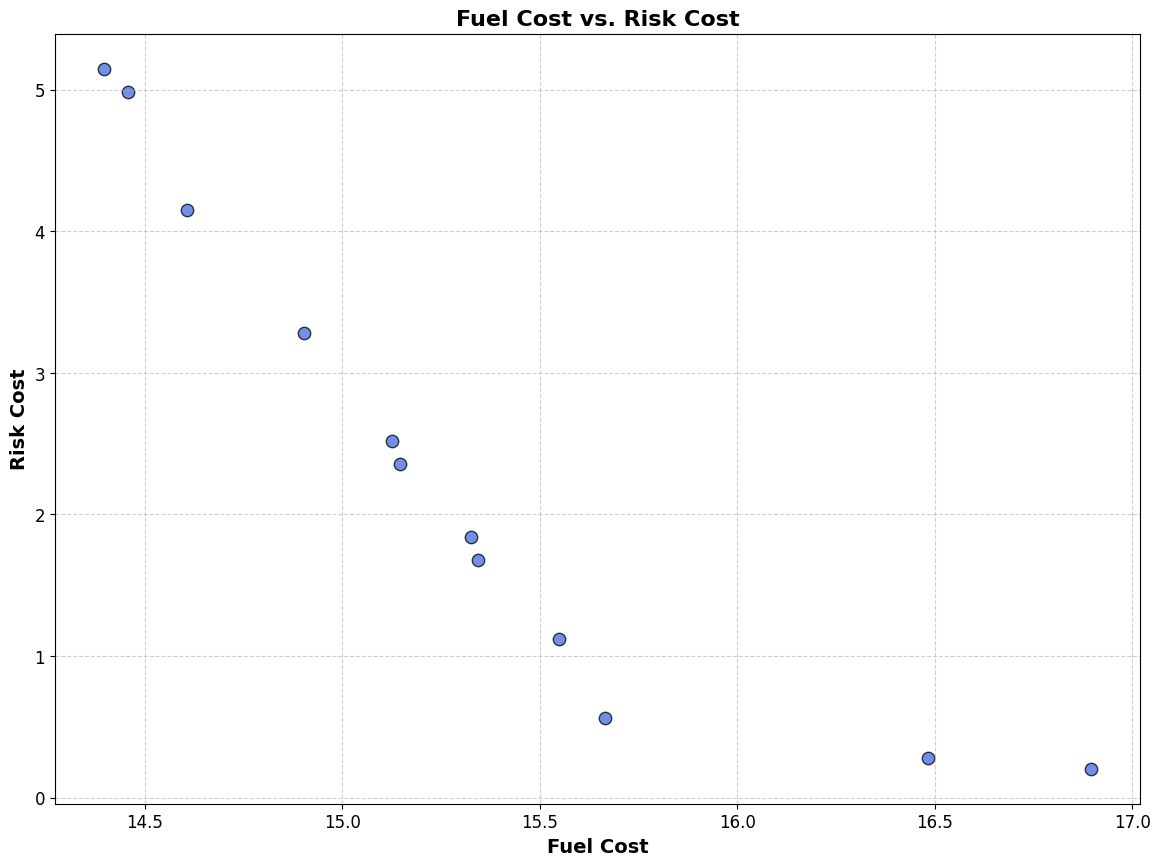

In [15]:
# Extract cost values for the goal state
fuel_costs, risk_costs = extract_costs(sols, goal_state)

min_fuel_value, min_fuel_index = min((value, index) for index, value in enumerate(fuel_costs))
min_risk_value = risk_costs[min_fuel_index]
print(f"Minimum fuel cost: {min_fuel_value}, Minimum risk cost: {min_risk_value}")
# Check Pareto optimality
dominated_indices = check_pareto_optimality(fuel_costs, risk_costs)
print("Dominated solution indices:", dominated_indices)

# Plot the results
plot_costs(fuel_costs, risk_costs)

In [16]:
# Reconstruct and print all solution paths
solution_paths = reconstruct_solution_paths(sols, start_state, goal_state)
print("Extracted Solution Paths:")
for spath in solution_paths:
    print(spath)
# =============================================================================
# End of Pipeline
# =============================================================================

Extracted Solution Paths:
[4, 124, 56, 283, 230, 5, 380, (14.396686554308676, 5.14882985236843)]
[4, 124, 56, 272, 240, 5, 380, (14.45607516161937, 4.98625518534795)]
[4, 119, 56, 283, 230, 5, 380, (14.60584660367056, 4.14964656701706)]
[4, 114, 56, 283, 230, 5, 380, (14.901903883396876, 3.27850132524347)]
[4, 119, 66, 283, 230, 5, 380, (15.124903812347462, 2.51591005765918)]
[4, 119, 66, 273, 241, 5, 380, (15.14446853657686, 2.35333539063870)]
[4, 114, 66, 283, 230, 5, 380, (15.32444667257791, 1.84088870319584)]
[4, 113, 65, 273, 241, 5, 380, (15.344011396807307, 1.67831403617536)]
[4, 119, 108, 65, 273, 241, 5, 380, (15.547599290452792, 1.11818809014867)]
[4, 114, 76, 65, 272, 240, 5, 380, (15.664954059458736, 0.563474197828225)]
[4, 139, 157, 175, 343, 210, 5, 380, (16.483228521650524, 0.278489987815888)]
[4, 139, 157, 175, 343, 357, 205, 5, 380, (16.89445767803171, 0.203944182295163)]


In [17]:
### select a specfic path for plotting
selected_path = solution_paths[2]

### plot the path
cost = selected_path[-1]
path = selected_path[:-1]

path_info = [ graph_object.visibility_graph[path[num]][path[num+1]] for num in range(len(path)-1)]

# Function to interpolate point along the line
def interpolate(t, node_i, node_j):
    xi, yi = node_i[0], node_i[1]
    xj, yj = node_j[0], node_j[1]
    
    x = xi + t * (xj - xi)
    y = yi + t * (yj - yi)
    
    return x, y

del path_info[-1]

total_path = []
for node_info in path_info:
    node_i = node_info["node_i_info"]
    node_j = node_info["node_j_info"]
    line_segment_info = node_info["line_segment"]
    
    distance = np.sqrt((node_i[0]-node_j[0])**2 + (node_i[1]-node_j[1])**2)
    SOC = node_i[3]
    point = [(node_i[0], node_i[1], SOC, "g")]
    print(line_segment_info)
    delta_SOC = 0
    for key, value in line_segment_info.items():
        if key[0] == "g":
            delta_SOC = abs(value[1]-value[0])*beta*distance
            # print("Entered with GAS " , value, "DELTA SOC IS ", delta_SOC)
        elif key[0] == "e":
            delta_SOC = -abs(value[1]-value[0])*alpha*distance
            # print("Entered with ELECTRIC " , value, "DELTA SOC IS ", delta_SOC, "ALPHA IS ", alpha, "DISTANCE IS", distance)

        SOC = SOC + delta_SOC
        
        x, y = interpolate(value[1], node_i, node_j)
        
        point.append((x, y, SOC, key[0]))
    
    total_path.extend(point)

# Round the floats to a certain precision and remove duplicates
rounded_set = set()
unique_list = []

for tup in total_path:
    rounded = tuple(x for x in tup)
    if rounded not in rounded_set:
        rounded_set.add(rounded)
        unique_list.append(tup)

{'g': (0, 0.0), 'e': (0.0, 0.3333333333333333), 'g2': (0.3333333333333333, 1)}
{'g': (0, 0.0), 'e': (0.0, 0.7182335127930838), 'g2': (0.7182335127930838, 1)}
{'g': (0, 0.9525383752906603), 'e': (0.9525383752906603, 1)}
{'g': (0, 0.013963022000527556), 'e': (0.013963022000527556, 1)}
{'g': (0, 0.6666666666666666), 'e': (0.6666666666666666, 1)}


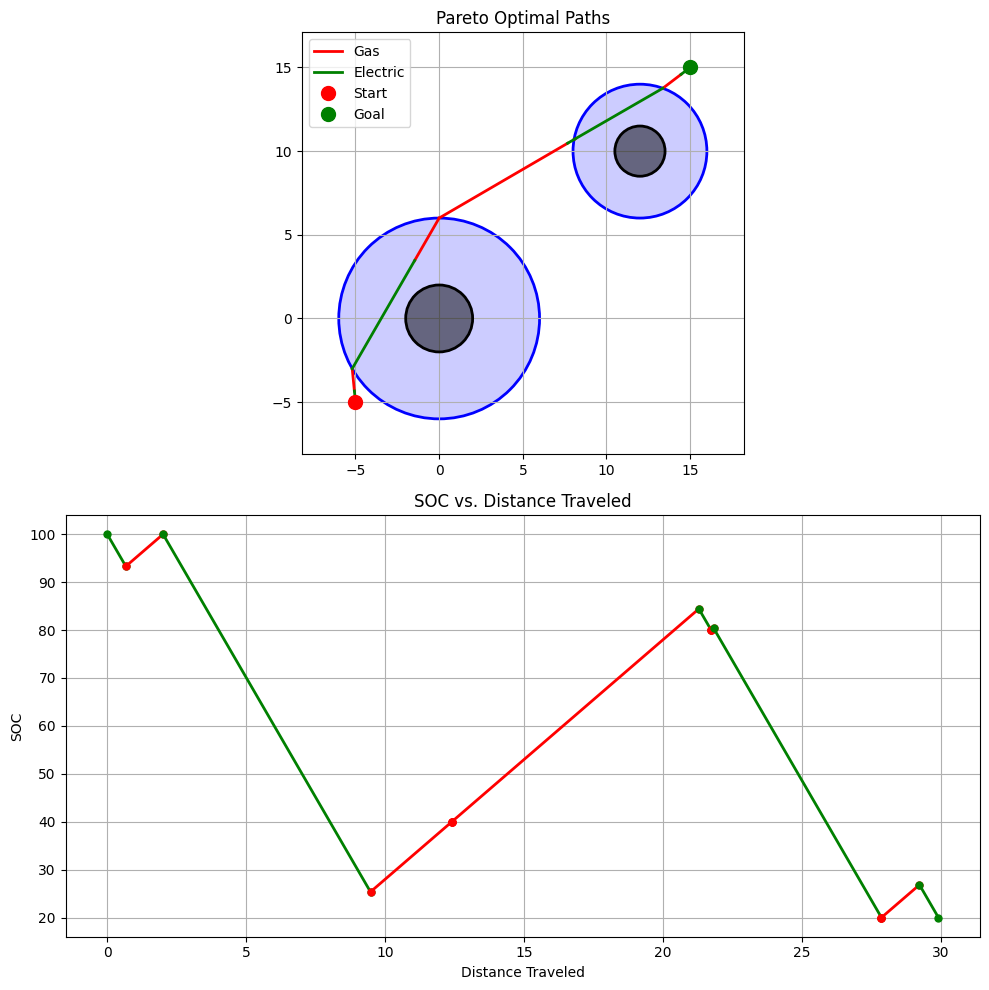

In [18]:
plot_map_with_path_and_soc(graph_object, map_qz, start, goal, unique_list, reverse_index_map)